<a id='top'> </a> <br>
## Contents
1. [Introduction](#1)
2. [Load packages](#2)
3. [Overview of DataSets](#3)
4. [Data Exploration and Visualization](#4)
5. [Creating New Data Frame](#5)
6. [Building Logistic Regression Model](#6)
7. [Training and Predicting](#7)
8. [Testing our model](#8)
9. [Conculsion](#9)

       

<a id=1></p><br>
# Introduction

In this project I have analyzed the heart diseases. It is the Cleveland database. 
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.
The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.
Meaning of attributes in the dataset:-
1) age age in years
2) sex(1 = male; 0 = female)
3) cp chest pain type
4) trestbps resting blood pressure (in mm Hg on admission to the hospital)
5) chol serum cholestoral in mg/dl
6) fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7) restecg resting electrocardiographic results
8) thalach maximum heart rate achieved
9) exang exercise induced angina (1 = yes; 0 = no)
10) oldpeak ST depression induced by exercise relative to rest
11) slope the slope of the peak exercise ST segment
12) ca number of major vessels (0-3) colored by flourosopy
13) thal 3 = normal; 6 = fixed defect; 7 = reversable defect
12) target 1 or 0


<a id=2></p><br>
# Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
pd.options.mode.chained_assignment = None
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

<a id=3></p><br>
# Overview of DataSets

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#The dataset has no null values

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.shape

(303, 14)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<a id=4></p><br>
# Data Exploration and Visualization

<AxesSubplot:>

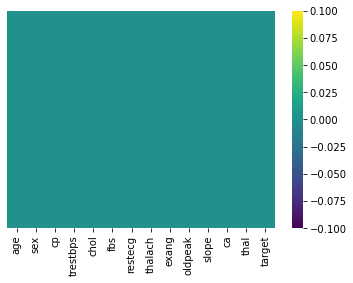

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:>

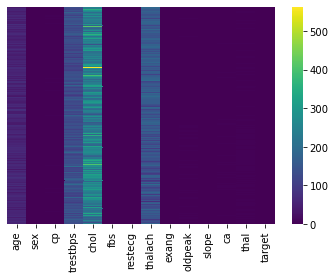

In [11]:
sns.heatmap(df,yticklabels=False,cmap='viridis')

In [12]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='target', ylabel='count'>

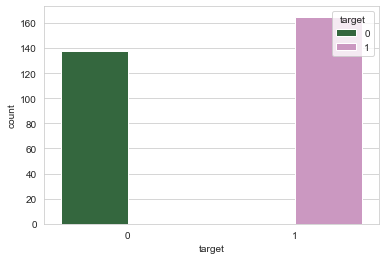

In [13]:
sns.countplot(x="target",hue="target",data=df,palette='cubehelix')

## Target vs Age Distribution

Text(0.5, 0, 'Target')

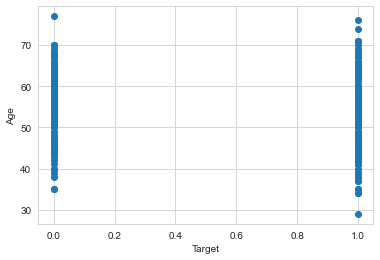

In [14]:
plt.scatter(x='target',y='age',data=df)
plt.ylabel('Age')
plt.xlabel('Target')

<AxesSubplot:xlabel='age'>

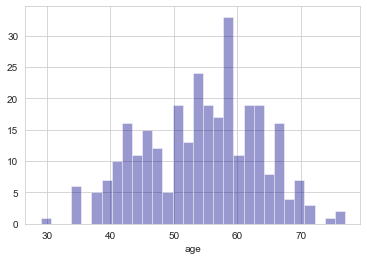

In [15]:
sns.distplot(df['age'],kde=False,color='darkblue',bins=30)

In [16]:
# this graph shows the age in the dataset. We can conclude that we have mostly the data of people aging from 50-60.

<AxesSubplot:xlabel='cp'>

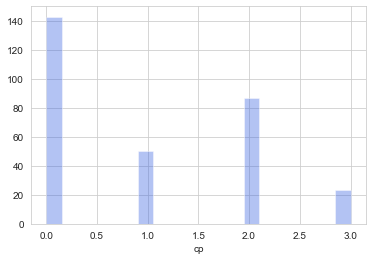

In [17]:
sns.distplot(df['cp'],kde=False,color='royalblue',bins=20)

In [18]:
# this graph shows the values of chest pain. We can conclude 0 as an outlier here.

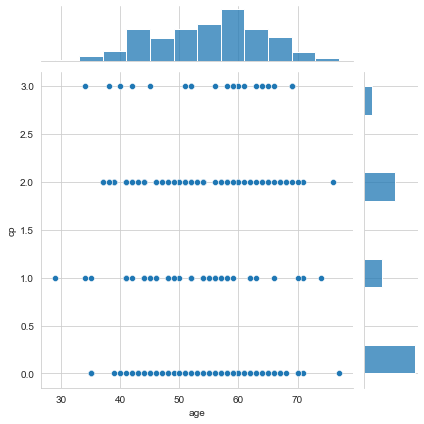

In [19]:
sns.jointplot(x='age',y='cp',data=df)

In [20]:
# Mostly people after the age of 40(aprrox) are having chest pain

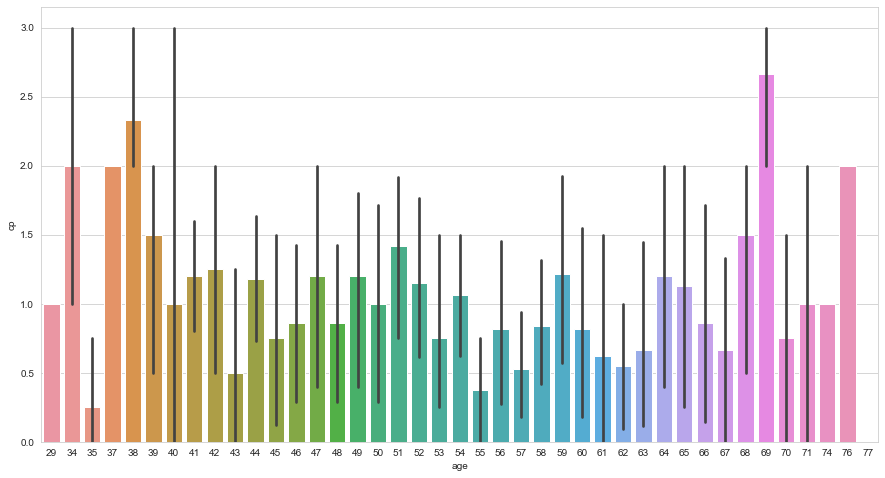

In [21]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x='age',y="cp",data=df)

## Visualising the resting blood pressure (in mm Hg on admission to the hospital)

In [22]:
df['trestbps'].iplot(kind='hist',bins=40,color='red')

## Visualising the serum cholestoral in mg/dl

In [23]:
df['chol'].iplot(kind='hist',bins=40,color='blue')

## Visualising fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

<AxesSubplot:xlabel='count', ylabel='fbs'>

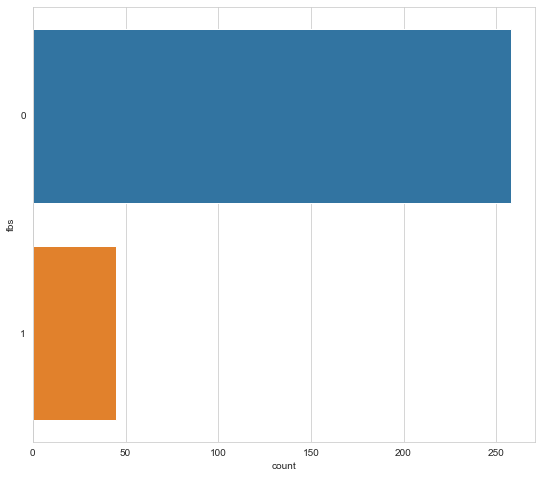

In [24]:
plt.figure(figsize=(9,8))
sns.countplot(y='fbs',data=df)

## Visualising resting electrocardiographic results

<AxesSubplot:xlabel='count', ylabel='restecg'>

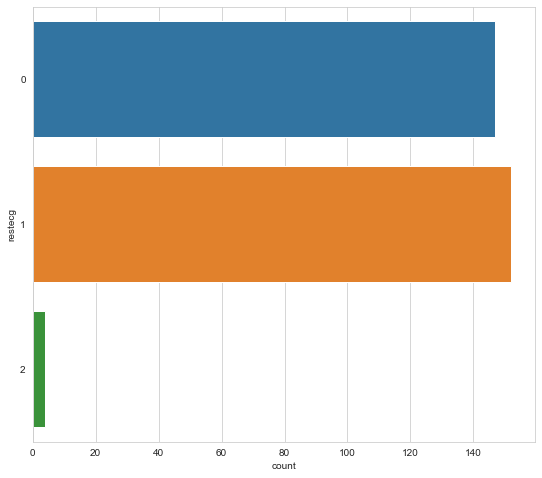

In [25]:
plt.figure(figsize=(9,8))
sns.countplot(y='restecg',data=df)

## Visualising the maximum heart rate achieved

<AxesSubplot:xlabel='thalach'>

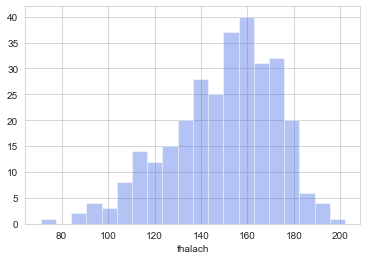

In [26]:
sns.distplot(df['thalach'],kde=False,color='royalblue',bins=20)

## Visualising the ST depression induced by exercise relative to rest

In [27]:
df['oldpeak'].iplot(kind='hist',bins=40,color='yellow')

## Visualising slope of the peak exercise ST segment

In [28]:
df['slope'].iplot(kind='hist',bins=40,color='orange')

## Visualising 'thal' where 3 = normal; 6 = fixed defect; 7 = reversable defect

In [29]:
df['thal'].iplot(kind='hist',bins=40,color='purple')

## Visualising number of major vessels (0-3) colored by flourosopy

In [30]:
df['ca'].iplot(kind='hist',bins=40,color='pink')

## 'ca' vs 'thal'

<AxesSubplot:xlabel='ca', ylabel='thal'>

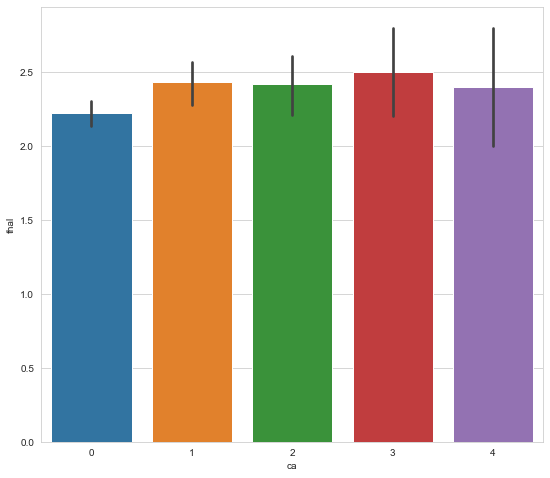

In [31]:
plt.figure(figsize=(9,8))
sns.barplot(x='ca',y='thal',data=df)

## Correlation Matrix

In [32]:
corrMatrix=df.corr()

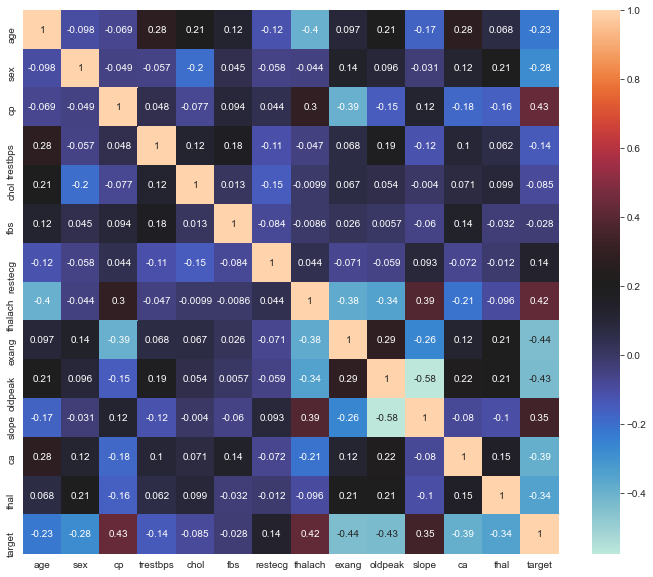

In [33]:
f,ax=plt.subplots(figsize=(12,10))
ax=sns.heatmap(corrMatrix,annot=True,cmap='icefire')

<a id=5></p><br>
# Creating new DataFrame

In [34]:
x=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

In [35]:
y=['target']

In [36]:
df2=pd.DataFrame(data=df)
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<a id=6></p><br>
# Building Logistic Regression Model

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df['target'],test_size=0.20,random_state=101)

In [38]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3


<a id=7></p><br>
# Training and Predicting

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LRModel=LogisticRegression()

In [41]:
LRModel.fit(X_train,y_train)

LogisticRegression()

<a id=8></p><br>
# Testing our model

In [42]:
predictions_heart=LRModel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_test,predictions_heart))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [45]:
x=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']
data=[45,1,3,180,204,0,0,178,0,0.7,2,2,3]
paitentid_54=pd.DataFrame([data],columns=x)
paitentid_54.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,45,1,3,180,204,0,0,178,0,0.7,2,2,3


In [46]:
predictions_heart=LRModel.predict(paitentid_54)

In [47]:
print(predictions_heart)

[1]


In [48]:
x=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']
data=[23,0,3,180,204,1,1,178,1,0.7,2,1,3]
paitentid_55=pd.DataFrame([data],columns=x)
paitentid_55.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,23,0,3,180,204,1,1,178,1,0.7,2,1,3


In [49]:
predictions_heart=LRModel.predict(paitentid_55)

In [50]:
print(predictions_heart)

[1]


In [51]:
x=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']
data=[23,0,1,140,100,1,1,120,1,0.1,2,1,7]
paitentid_56=pd.DataFrame([data],columns=x)
paitentid_56.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,23,0,1,140,100,1,1,120,1,0.1,2,1,7


In [52]:
predictions_heart=LRModel.predict(paitentid_56)

In [53]:
print(predictions_heart)

[0]


In [54]:
# 0 means no heart disease whereas 1 means the paitent has heart disease

In [55]:
# model is 88% accurate

<a id=9></p><br>
# Conclusion

In this project we have done the analysis of the dataset by various graphs including 'cufflinks'.
Then we have trained our model with the given dataset.
We have used Logistic Regression for tarinig as well as for prediction.
0 means the paitent does not has heart disease where as 1 means the paitent has heart disease.
My model is 88% accurate.